<a href="https://colab.research.google.com/github/soumyapachal-SP/Intrusion-Detection-System/blob/main/CICIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting to Drive for fetching the datasets**

In [ ]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Convering zip files to csv and merging all the datasets**

In [ ]:
import pandas as pd
import zipfile
import os

# Define the directory where files are stored
data_dir = "/content/"
extract_path = os.path.join(data_dir, "extracted")

# List of uploaded zip files
zip_files = [
    "/content/drive/MyDrive/cicids1/Monday-WorkingHours.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Tuesday-WorkingHours.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Wednesday-workingHours.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Friday-WorkingHours-Morning.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv.zip",
    "/content/drive/MyDrive/cicids1/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv.zip"
]

os.makedirs(extract_path, exist_ok=True)

# Extract all zip files
for zip_file in zip_files:
    zip_path = os.path.join(data_dir, zip_file)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# List all extracted CSV files
csv_files = [f for f in os.listdir(extract_path) if f.endswith(".csv")]

# Load and merge all CSV files
df_list = []
for csv_file in csv_files:
    file_path = os.path.join(extract_path, csv_file)
    df = pd.read_csv(file_path, low_memory=False)  # Avoid dtype warning
    df_list.append(df)

# Merge all dataframes
df_merged = pd.concat(df_list, ignore_index=True)

# Clean column names
df_merged.columns = df_merged.columns.str.strip()

# Drop missing values
df_merged.dropna(inplace=True)

# Save merged dataset
merged_csv_path = os.path.join(data_dir, "CIC_IDS2017_Merged.csv")
df_merged.to_csv(merged_csv_path, index=False)

print(f"Merged dataset saved at: {merged_csv_path}")
print(df_merged.head())  # Display first few rows

Merged dataset saved at: /content/CIC_IDS2017_Merged.csv
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0 

In [ ]:
df = pd.DataFrame(df_merged)

**Ckecking the columns neames**

In [ ]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2829385 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow 

**Calculating the infinite, NaN and duplicate values**

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
is_inf = df.isin([np.inf, -np.inf])

inf_counts = is_inf.sum()

# Filter to show only columns with infinite values
columns_with_inf = inf_counts[inf_counts > 0]
print("Columns with infinite values:\n",columns_with_inf)

nan_counts = df.isnull().sum()

# Filter to show only columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]
print("\nColumns with NaN values:\n", columns_with_nan)

combined_counts = nan_counts + inf_counts

# Filter to show only columns with any NaN or inf values
columns_with_nan_or_inf = combined_counts[combined_counts > 0]
print("\nColumns with NaN or infinite values:\n", columns_with_nan_or_inf)

duplicate_rows_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows_count)

Columns with infinite values:
 Flow Bytes/s      1509
Flow Packets/s    1509
dtype: int64

Columns with NaN values:
 Series([], dtype: int64)

Columns with NaN or infinite values:
 Flow Bytes/s      1509
Flow Packets/s    1509
dtype: int64

Number of duplicate rows: 307376


**Dropping the  infinite, NaN and duplicate values**

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

**Dropping the target column**

In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']

In [ ]:
rp = {
    "base": "#191724",
    "surface": "#1f1d2e",
    "overlay": "#26233a",
    "muted": "#6e6a86",
    "subtle": "#908caa",
    "text": "#e0def4",
    "love": "#eb6f92",
    "gold": "#f6c177",
    "rose": "#ebbcba",
    "pine": "#31748f",
    "foam": "#9ccfd8",
    "iris": "#c4a7e7",
    "highlightLow": "#21202e",
    "highlightMed": "#403d52",
    "highlightHigh": "#524f67",
}

**Plotting the network activity distribution**

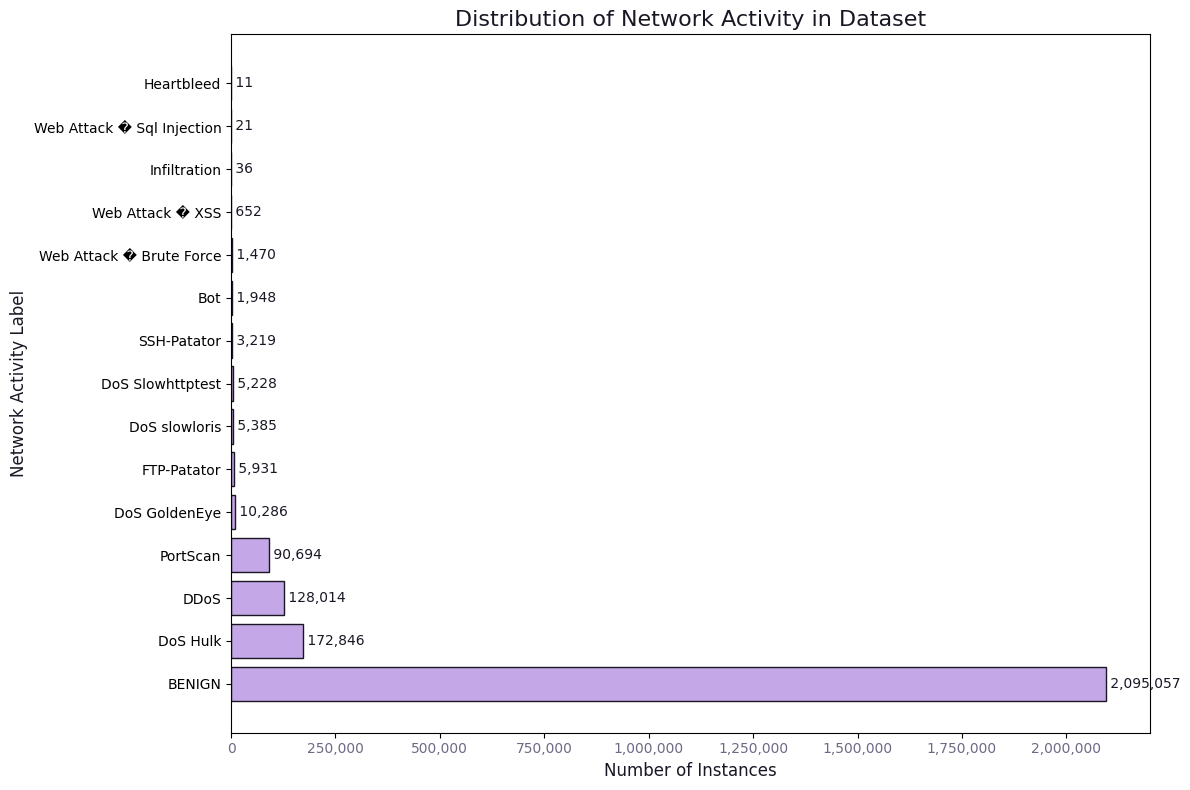

In [ ]:
df_label_distribution = df['Label'].value_counts()

# Prepare data for plotting
x_coords = df_label_distribution.index
y_coords = df_label_distribution.values

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the distribution
ax.barh(
    x_coords,
    y_coords,
    color=rp["iris"],      # Use Rose Pine iris color
    edgecolor=rp["base"]   # Use Rose Pine base color for edges
)

# Add text at the end of each bar
for i, value in enumerate(y_coords):
    ax.text(
        value,
        i,
        f" {value:,}",
        va="center",
        fontsize=10,
        color=rp["base"]
    )

# Add chart details
ax.set_title(
    "Distribution of Network Activity in Dataset",
    fontsize=16,
    color=rp["base"]
)
ax.set_xlabel("Number of Instances", fontsize=12, color=rp["base"])
ax.set_ylabel("Network Activity Label", fontsize=12, color=rp["base"])

# Adjust x-tick limits and format labels
max_y = max(y_coords)
ax.set_xticks(range(0, max_y + 50_000, 250_000))
ax.set_xticklabels([f"{x:,}" for x in range(0, max_y + 50_000, 250_000)], fontsize=10, color=rp["muted"])

# Layout and display
plt.tight_layout()
plt.show()

In [ ]:
category_mapping = {
    'BENIGN': 'BENIGN',
    'Bot': 'BOTNET',
    'DDoS': 'DOS',
    'DoS GoldenEye': 'DOS',
    'DoS Hulk': 'DOS',
    'DoS Slowhttptest': 'DOS',
    'DoS slowloris': 'DOS',
    'FTP-Patator': 'BRUTE_FORCE',
    'SSH-Patator': 'BRUTE_FORCE',
    'Heartbleed': 'WEB_ATTACK',
    'Infiltration': 'WEB_ATTACK',
    'PortScan': 'RECONNAISSANCE',
    'Web Attack � Brute Force': 'WEB_ATTACK',
    'Web Attack � Sql Injection': 'WEB_ATTACK',
    'Web Attack � XSS': 'WEB_ATTACK'
}
y = y.map(category_mapping)

# experimental binary mapping see Version 33 for this
#malice_mapping = {
#    'BENIGN': 'BENIGN',
#    'BOTNET': 'MALICIOUS',
#    'DOS': 'MALICIOUS',
#    'BRUTE_FORCE': 'MALICIOUS',
#    'WEB_ATTACK': 'MALICIOUS',
#    'RECONNAISSANCE': 'MALICIOUS'
#}

#y = y.map(malice_mapping)

print(y.unique())

['BENIGN' 'DOS' 'WEB_ATTACK' 'RECONNAISSANCE' 'BRUTE_FORCE' 'BOTNET']


**Finally Training the model**

In [ ]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# ----------------------- Load Data ----------------------- #
target_col = 'Label'  # Change this based on your dataset

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found! Available columns: {df.columns.tolist()}")

# Feature-Target Split
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------- Faster Alternative to SMOTE ---------------------- #
# Get class counts
class_counts = Counter(y_train)
maj_class = max(class_counts, key=class_counts.get)  # Majority class
min_class_size = min(class_counts.values())

# Define over-sampling strategy: Make each minority class at least 50% of the majority
oversample_strategy = {
    cls: int(0.5 * class_counts[maj_class]) for cls in class_counts if class_counts[cls] < class_counts[maj_class]
}

# Define under-sampling strategy: Reduce the majority class
undersample_strategy = {
    maj_class: int(0.8 * class_counts[maj_class])  # Keep 80% of majority samples
}

# Apply Over-Sampling (First step)
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Apply Under-Sampling (Second step)
rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

print(f"Balanced Data Distribution: {Counter(y_train)}")

# ---------------------------- Train Base Models ---------------------------- #
start_fit = time.time()

rf = RandomForestClassifier(
    n_estimators=50,      # Reduce number of trees
    max_depth=10,         # Limit depth
    class_weight='balanced',
    random_state=42,
    n_jobs=-1             # Use all CPU cores
)
rf.fit(X_train, y_train)
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=8,
    learning_rate=0.1,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)
end_fit = time.time()
print(f"Base Model Training Time: {end_fit - start_fit:.2f} seconds")

# ---------------------------- Hypergraph-Based Ensemble ---------------------------- #
def hypergraph_ensemble(preds_rf, preds_xgb, weights=(0.6, 0.4)):
    """Weighted voting ensemble for final prediction."""
    final_preds = []
    for i in range(len(preds_rf)):
        pred_votes = {
            preds_rf[i]: weights[0],
            preds_xgb[i]: weights[1],
        }
        final_preds.append(max(pred_votes, key=pred_votes.get))
    return np.array(final_preds)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_ensemble = hypergraph_ensemble(y_pred_rf, y_pred_xgb)

# ---------------------------- Evaluation ---------------------------- #
print("\n--- Classification Report for Hypergraph Ensemble ---")
print(classification_report(y_test, y_pred_ensemble, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble)

# ---------------------------- Hyperparameter Tuning ---------------------------- #
params_rf = {'max_depth': [10, 15, 20], 'n_estimators': [50, 100, 150]}
params_xgb = {'max_depth': [6, 10, 15], 'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}

rf_grid = HalvingGridSearchCV(rf, params_rf, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
xgb_grid = HalvingGridSearchCV(xgb, params_xgb, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

start_fit = time.time()
rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
end_fit = time.time()

print(f"Hyperparameter Tuning Time: {end_fit - start_fit:.2f} seconds")
print("Best RF Params:", rf_grid.best_params_)
print("Best XGB Params:", xgb_grid.best_params_)

# ---------------------------- Train Final Models ---------------------------- #
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_
rf_best.fit(X_train, y_train)
xgb_best.fit(X_train, y_train)

# Final Predictions
y_pred_rf_best = rf_best.predict(X_test)
y_pred_xgb_best = xgb_best.predict(X_test)
y_pred_ensemble_best = hypergraph_ensemble(y_pred_rf_best, y_pred_xgb_best)

# ---------------------------- Final Evaluation ---------------------------- #
print("\n--- Final Classification Report for Optimized Hypergraph Ensemble ---")
print(classification_report(y_test, y_pred_ensemble_best, digits=4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble_best)

Balanced Data Distribution: Counter({0: 1340836, 1: 838022, 2: 838022, 3: 838022, 4: 838022, 5: 838022, 6: 838022, 7: 838022, 8: 838022, 9: 838022, 10: 838022, 11: 838022, 12: 838022, 13: 838022, 14: 838022})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:20:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Base Model Training Time: 904.67 seconds

--- Classification Report for Hypergraph Ensemble ---
              precision    recall  f1-score   support

           0     0.9991    0.9510    0.9744    419012
           1     0.0287    1.0000    0.0558       390
           2     0.9974    0.9986    0.9980     25603
           3     0.8379    0.9878    0.9067      2057
           4     0.9868    0.9879    0.9874     34569
           5     0.7362    0.9952    0.8463      1046
           6     0.8441    0.9851    0.9092      1077
           7     0.9992    0.9992    0.9992      1186
           8     1.0000    0.5000    0.6667         2
           9     0.0206    1.0000    0.0403         7
          10     0.9864    0.9985    0.9924     18139
          11     0.8834    1.0000    0.9381       644
          12     0.1341    0.4490    0.2066       294
          13     0.0014    1.0000    0.0027         4
          14     0.0585    0.8308    0.1093       130

    accuracy                         0

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


----------
iter: 1
n_candidates: 3
n_resources: 4357713
Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))
rf_report = classification_report(y_test, y_pred, digits=4, output_dict=True)

                precision    recall  f1-score   support

        BENIGN     0.9990    0.9993    0.9991    837730
        BOTNET     0.8528    0.7705    0.8096       767
   BRUTE_FORCE     1.0000    0.9981    0.9991      3733
           DOS     0.9990    0.9979    0.9985    128761
RECONNAISSANCE     0.9893    0.9886    0.9890     36467
    WEB_ATTACK     0.9917    0.9710    0.9812       862

      accuracy                         0.9985   1008320
     macro avg     0.9720    0.9543    0.9627   1008320
  weighted avg     0.9985    0.9985    0.9985   1008320



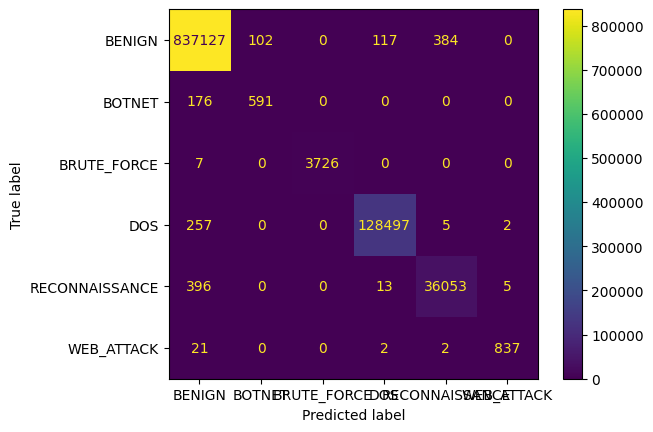

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_confm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.1 MB/s eta 0:00:00


In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.4 MB/s eta 0:00:00
